In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [6]:
aqi = pd.read_csv("aqi-Day&State.csv")
health = pd.read_csv("idsp.csv", encoding="cp1252")
population = pd.read_csv("population_projection.csv") 
vehicles = pd.read_csv("vahan.csv")

In [7]:
for df, name in zip([aqi, health, population, vehicles], 
                    ["AQI", "Health", "Population", "Vehicles"]):
    print(f"\n{name} Dataset:")
    print(df.head())
    print(df.info())
    print(df.describe())


AQI Dataset:
         date           state      area  number_of_monitoring_stations  \
0  30-04-2025     Maharashtra  Amravati                              2   
1  30-04-2025           Bihar    Purnia                              1   
2  30-04-2025  Madhya Pradesh     Katni                              1   
3  30-04-2025    Chhattisgarh   Tumidih                              1   
4  30-04-2025           Assam  Byrnihat                              1   

  prominent_pollutants  aqi_value air_quality_status  \
0                 PM10         78       Satisfactory   
1                   CO         56       Satisfactory   
2                   O3         98       Satisfactory   
3                 PM10        103           Moderate   
4                PM2.5         61       Satisfactory   

                                                unit  note  
0  number_of_monitoring_stations in Absolute Numb...   NaN  
1  number_of_monitoring_stations in Absolute Numb...   NaN  
2  number_of_monitori

In [12]:
# Remov 'unit' and 'note' columns from each dataset
aqi = aqi.drop(columns=['unit', 'note'])
health = health.drop(columns=['unit', 'note'])
population = population.drop(columns=['unit', 'note'])
vehicles = vehicles.drop(columns=['unit', 'note'])

In [14]:
for df, name in zip([aqi, health, population, vehicles], 
                    ["AQI", "Health", "Population", "Vehicles"]):
    print(f"\n{name} Dataset:")
    print(df.head())


AQI Dataset:
         date           state      area  number_of_monitoring_stations  \
0  30-04-2025     Maharashtra  Amravati                              2   
1  30-04-2025           Bihar    Purnia                              1   
2  30-04-2025  Madhya Pradesh     Katni                              1   
3  30-04-2025    Chhattisgarh   Tumidih                              1   
4  30-04-2025           Assam  Byrnihat                              1   

  prominent_pollutants  aqi_value air_quality_status  
0                 PM10         78       Satisfactory  
1                   CO         56       Satisfactory  
2                   O3         98       Satisfactory  
3                 PM10        103           Moderate  
4                PM2.5         61       Satisfactory  

Health Dataset:
   year  week outbreak_starting_date reporting_date           state  \
0  2025    16             15-04-2025     15-04-2025  Andhra Pradesh   
1  2025    16             15-04-2025     17-04-2025 

In [16]:
date_cols = {
    "aqi": "date",
    "health": "outbreak_starting_date",
}
aqi['date'] = pd.to_datetime(aqi['date'], errors='coerce')
health['outbreak_starting_date'] = pd.to_datetime(health['outbreak_starting_date'], errors='coerce')

C:\Users\Priyanshu Prakash\AppData\Local\Temp\ipykernel_13408\1551965803.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  aqi['date'] = pd.to_datetime(aqi['date'], errors='coerce')
C:\Users\Priyanshu Prakash\AppData\Local\Temp\ipykernel_13408\1551965803.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  health['outbreak_starting_date'] = pd.to_datetime(health['outbreak_starting_date'], errors='coerce')


In [18]:
aqi.head(100)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory
3,2025-04-30,Chhattisgarh,Tumidih,1,PM10,103,Moderate
4,2025-04-30,Assam,Byrnihat,1,PM2.5,61,Satisfactory
...,...,...,...,...,...,...,...
95,2025-04-30,Telangana,Hyderabad,11,"PM2.5,PM10",74,Satisfactory
96,2025-04-30,Puducherry,Puducherry,1,O3,28,Good
97,2025-04-30,Uttar Pradesh,Khurja,1,PM10,129,Moderate
98,2025-04-30,Rajasthan,Bundi,1,O3,184,Moderate


In [20]:
aqi.sample(frac=0.1)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status
130427,2023-10-28,Karnataka,Haveri,1,PM2.5,86,Satisfactory
196048,2022-12-11,West Bengal,Haldia,1,PM10,157,Moderate
151537,2023-07-24,Tamil Nadu,Salem,1,SO2,28,Good
116854,2023-12-24,Rajasthan,Banswara,1,PM2.5,212,Poor
68169,2024-07-16,Madhya Pradesh,Bhopal,3,PM10,82,Satisfactory
...,...,...,...,...,...,...,...
83681,2024-05-10,Bihar,Muzaffarpur,2,"PM2.5,PM10",59,Satisfactory
25125,2025-01-11,Madhya Pradesh,Indore,4,"PM2.5,PM10",107,Moderate
178652,2023-03-14,West Bengal,Asansol,1,PM2.5,229,Poor
35988,2024-11-26,Maharashtra,Ahmednagar,1,O3,150,Moderate


In [22]:
aqi.columns = aqi.columns.str.lower().str.strip().str.replace(" ", "_")
health.columns = health.columns.str.lower().str.strip().str.replace(" ", "_")
population.columns = population.columns.str.lower().str.strip().str.replace(" ", "_")
vehicles.columns = vehicles.columns.str.lower().str.strip().str.replace(" ", "_")

In [24]:
aqi.sample(25)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status
104922,2024-02-12,Haryana,Ballabgarh,1,PM2.5,276,Poor
52893,2024-09-20,Uttar Pradesh,Prayagraj,3,"PM10,SO2",43,Good
75742,2024-06-13,Uttar Pradesh,Kanpur,3,"PM10,O3",140,Moderate
233012,2022-04-19,Bihar,Aurangabad,1,PM10,299,Poor
153965,2023-07-13,Gujarat,Vatva,1,PM10,96,Satisfactory
184597,2023-02-12,Tamil Nadu,Coimbatore,1,PM2.5,102,Moderate
144359,2023-08-26,Rajasthan,Dholpur,1,PM10,74,Satisfactory
177222,2023-03-22,Tamil Nadu,Hosur,1,CO,133,Moderate
170308,2023-04-24,Jharkhand,Jorapokhar,1,PM10,110,Moderate
31614,2024-12-13,Haryana,Bahadurgarh,1,PM2.5,249,Poor


In [26]:
aqi.drop_duplicates(inplace=True)
health.drop_duplicates(inplace=True)

In [28]:
# Summary Statistics
# ===============================
print("\nTop Pollutants:")
print(aqi['prominent_pollutants'].value_counts())

print("\nTop Diseases:")
print(health['disease_illness_name'].value_counts())




Top Pollutants:
prominent_pollutants
PM10                 111053
PM2.5                 59670
O3                    16202
PM2.5,PM10            13199
CO                    12867
PM10,O3                3914
SO2                    3815
NO2                    3012
PM10,CO                2658
PM2.5,O3               2088
PM10,NO2               1278
O3,PM2.5,PM10          1019
PM2.5,PM10,CO           710
PM10,SO2                551
CO,O3                   543
PM10,O3,CO              418
PM2.5,NO2               415
PM10,PM2.5,NO2          281
PM2.5,SO2               278
CO,NO2                  274
PM10,NO2,O3             216
NO2,PM10,CO             191
CO,SO2                  167
NO2,O3                  139
PM10,PM2.5,SO2          111
SO2,O3                  109
PM2.5,CO,O3              99
PM10,CO,SO2              69
NH3                      69
PM10,SO2,O3              65
NO2,CO,O3                49
PM10,NO2,PM2.5,O3        43
PM2.5,CO,NO2             40
PM2.5,CO,SO2             36
NO2,SO2   

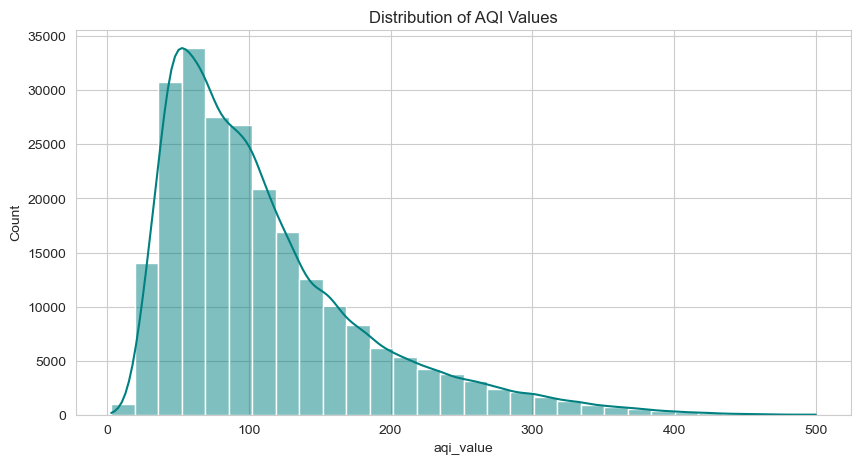

C:\Users\Priyanshu Prakash\AppData\Local\Temp\ipykernel_13408\2204988715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=aqi['air_quality_status'], order=aqi['air_quality_status'].value_counts().index, palette="viridis")


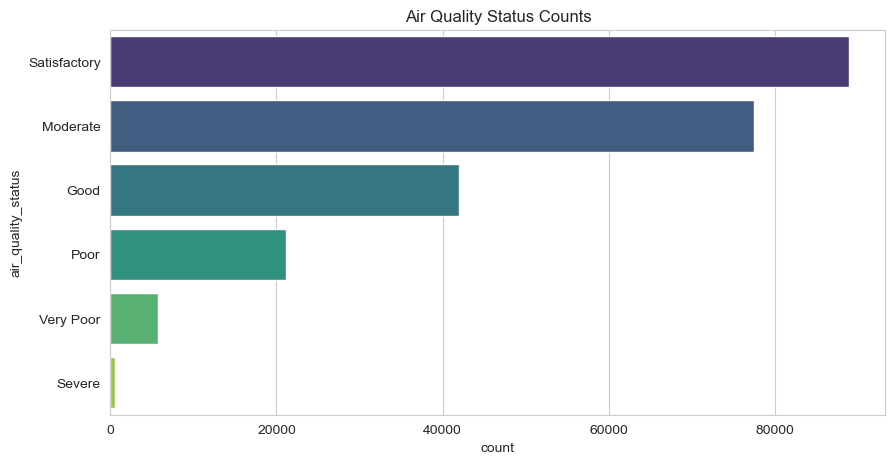

In [30]:
# Univariate Analysis
# ===============================
plt.figure(figsize=(10,5))
sns.histplot(aqi['aqi_value'], bins=30, kde=True, color='teal')
plt.title("Distribution of AQI Values")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y=aqi['air_quality_status'], order=aqi['air_quality_status'].value_counts().index, palette="viridis")
plt.title("Air Quality Status Counts")
plt.show()

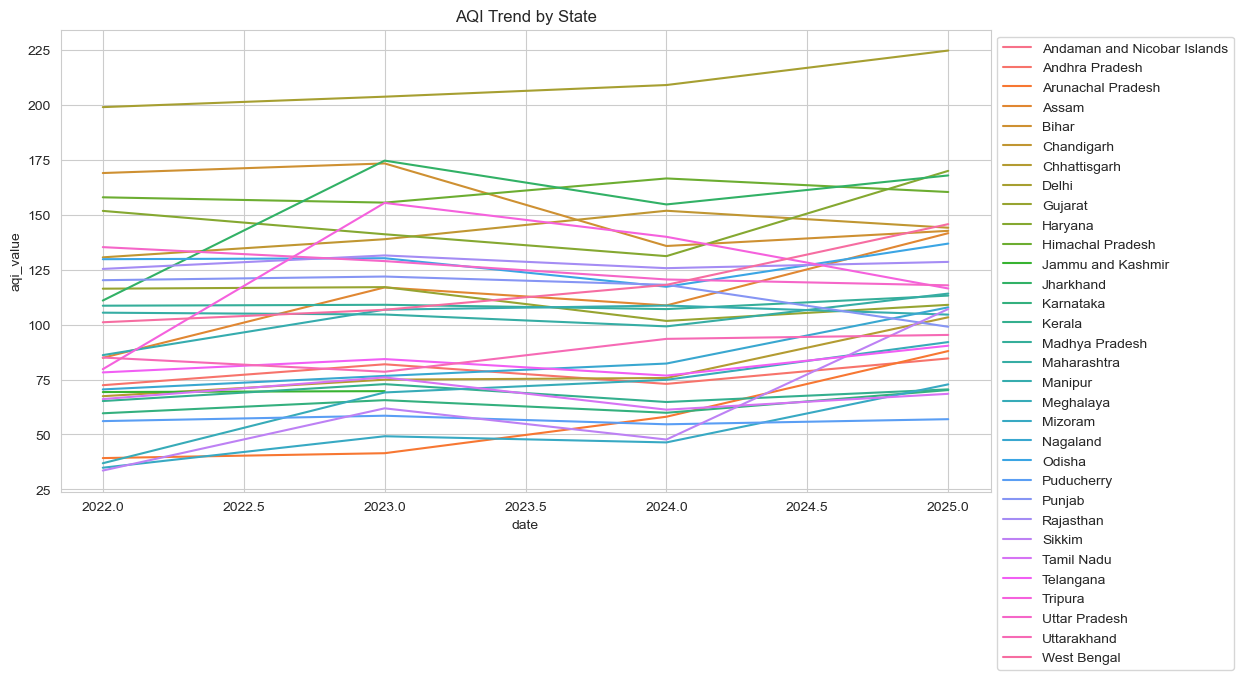

NameError: name 'merged_health_aqi' is not defined

<Figure size 800x600 with 0 Axes>

In [31]:
# Bivariate Analysis
# ===============================
# AQI trend by state
aqi_state_trend = aqi.groupby(['state', aqi['date'].dt.year])['aqi_value'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=aqi_state_trend, x='date', y='aqi_value', hue='state')
plt.title("AQI Trend by State")
plt.legend(bbox_to_anchor=(1,1))
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_health_aqi, x='aqi_value', y='cases', alpha=0.6)
plt.title("AQI vs Disease Cases")
plt.show()

In [ ]:

# Correlation between AQI & disease cases (merge datasets)
health['year'] = health['outbreak_starting_date'].dt.year
merged_health_aqi = pd.merge(
    health, 
    aqi.assign(year=aqi['date'].dt.year), 
    on=['state', 'year'], 
    how='inner'
)
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_health_aqi, x='aqi_value', y='cases', alpha=0.6)
plt.title("AQI vs Disease Cases")
plt.show()

In [34]:
# Merge Population & Vehicles with AQI
# ===============================
population['year'] = population['year'].astype(int)
vehicles['year'] = vehicles['year'].astype(int)

aqi['year'] = aqi['date'].dt.year
aqi['month'] = aqi['date'].dt.month

In [36]:
# Merge with population
aqi_pop = pd.merge(aqi, population, on=['state', 'year'], how='left')

# Merge with vehicles
aqi_pop_veh = pd.merge(aqi_pop, vehicles, on=['state', 'year'], how='left')

print("\nMerged Dataset Preview:")
print(aqi_pop_veh.head())


MemoryError: Unable to allocate 12.2 GiB for an array with shape (1641931398,) and data type int64

In [ ]:
# Derived Metrics
# ===============================
# Vehicle density
aqi_pop_veh['vehicle_density_per_1000'] = (aqi_pop_veh['value_y'] / aqi_pop_veh['value_x']) * 1000  # assuming value_x=population, value_y=vehicles

# Population exposed to AQI > WHO limit
population_exposed = aqi_pop_veh.loc[aqi_pop_veh['aqi_value'] > 50].groupby('state')['value_x'].sum().reset_index()
population_exposed.rename(columns={'value_x': 'population_exposed'}, inplace=True)

print("\nPopulation Exposed to Unsafe AQI:")
print(population_exposed)

# ===============================
# 10. Save Cleaned/Merged Data
# ===============================
aqi_pop_veh.to_csv("merged_aqi_population_vehicle.csv", index=False)
merged_health_aqi.to_csv("merged_health_aqi.csv", index=False)

1. Top 5 & Bottom 5 Areas by Average AQI

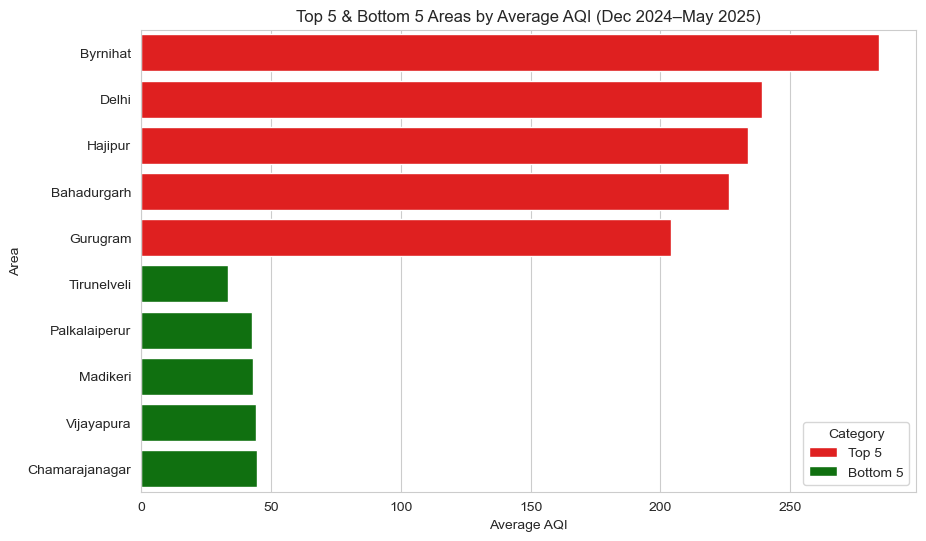

In [40]:
aqi['date'] = pd.to_datetime(aqi['date'])
mask = (aqi['date'] >= '2024-12-01') & (aqi['date'] <= '2025-05-31')
last_6m = aqi.loc[mask]

# Calculate average AQI per area
area_aqi = last_6m.groupby('area')['aqi_value'].mean().reset_index()

# Get top 5 and bottom 5
top5 = area_aqi.nlargest(5, 'aqi_value')
bottom5 = area_aqi.nsmallest(5, 'aqi_value')

# Combine for plotting
top_bottom = pd.concat([top5.assign(Category='Top 5'), bottom5.assign(Category='Bottom 5')])

plt.figure(figsize=(10,6))
sns.barplot(data=top_bottom, x='aqi_value', y='area', hue='Category', palette=['red','green'])
plt.title("Top 5 & Bottom 5 Areas by Average AQI (Dec 2024–May 2025)")
plt.xlabel("Average AQI")
plt.ylabel("Area")
plt.show()

2. Top 2 & Bottom 2 Pollutants per Southern State
(2022 onwards)

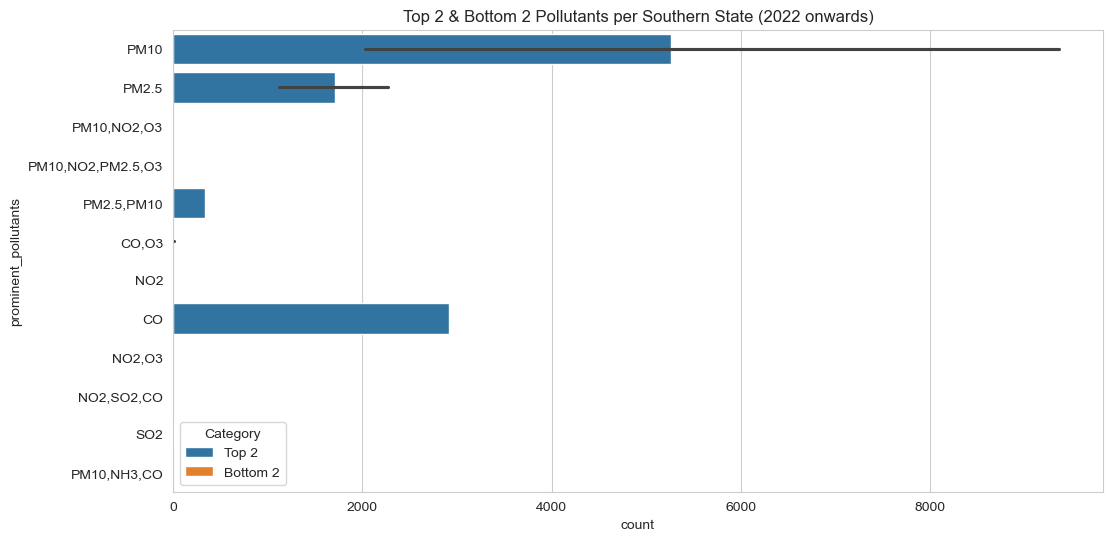

In [43]:
# Filter for post-2022 and southern states
southern_states = ["Andhra Pradesh", "Telangana", "Karnataka", "Kerala", "Tamil Nadu"]
aqi['year'] = aqi['date'].dt.year
south_data = aqi[(aqi['year'] >= 2022) & (aqi['state'].isin(southern_states))]

pollutant_counts = south_data.groupby(['state', 'prominent_pollutants']).size().reset_index(name='count')

# Top 2 and bottom 2 per state
top_bottom_pollutants = []
for state in southern_states:
    state_df = pollutant_counts[pollutant_counts['state'] == state]
    top2 = state_df.nlargest(2, 'count')
    bottom2 = state_df.nsmallest(2, 'count')
    top_bottom_pollutants.append(pd.concat([top2.assign(Category='Top 2'), bottom2.assign(Category='Bottom 2')]))

result = pd.concat(top_bottom_pollutants)

plt.figure(figsize=(12,6))
sns.barplot(data=result, x='count', y='prominent_pollutants', hue='Category')
plt.title("Top 2 & Bottom 2 Pollutants per Southern State (2022 onwards)")
plt.show()


3. Weekend vs Weekday AQI – Metro Cities
(Last 1 year)

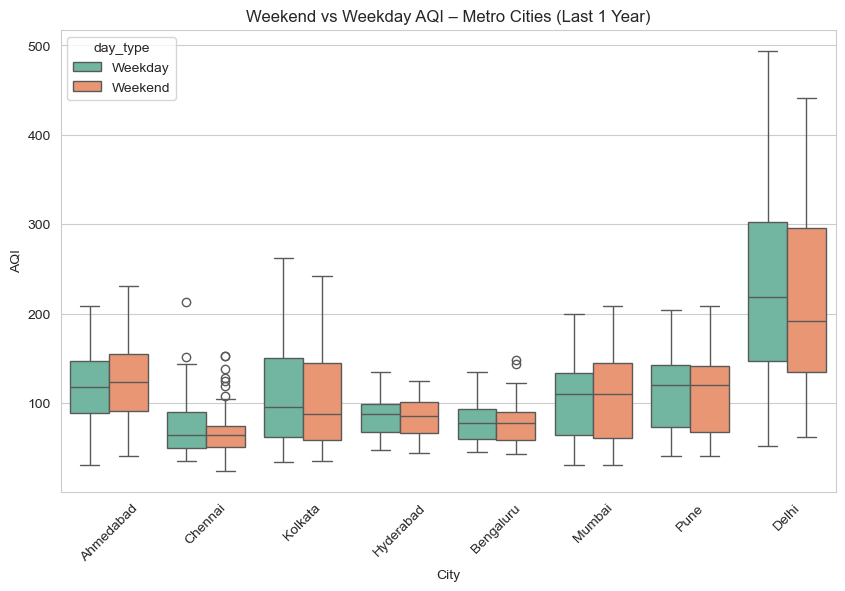

In [46]:
metro_cities = ["Delhi", "Mumbai", "Chennai", "Kolkata", "Bengaluru", "Hyderabad", "Ahmedabad", "Pune"]

one_year_data = aqi[aqi['date'] >= (pd.to_datetime("today") - pd.DateOffset(years=1))]
one_year_data = one_year_data[one_year_data['area'].isin(metro_cities)]

one_year_data['day_type'] = one_year_data['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

plt.figure(figsize=(10,6))
sns.boxplot(data=one_year_data, x='area', y='aqi_value', hue='day_type', palette="Set2")
plt.title("Weekend vs Weekday AQI – Metro Cities (Last 1 Year)")
plt.ylabel("AQI")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()


4. Months with Worst AQI – Top 10 States
(Based on distinct area count)

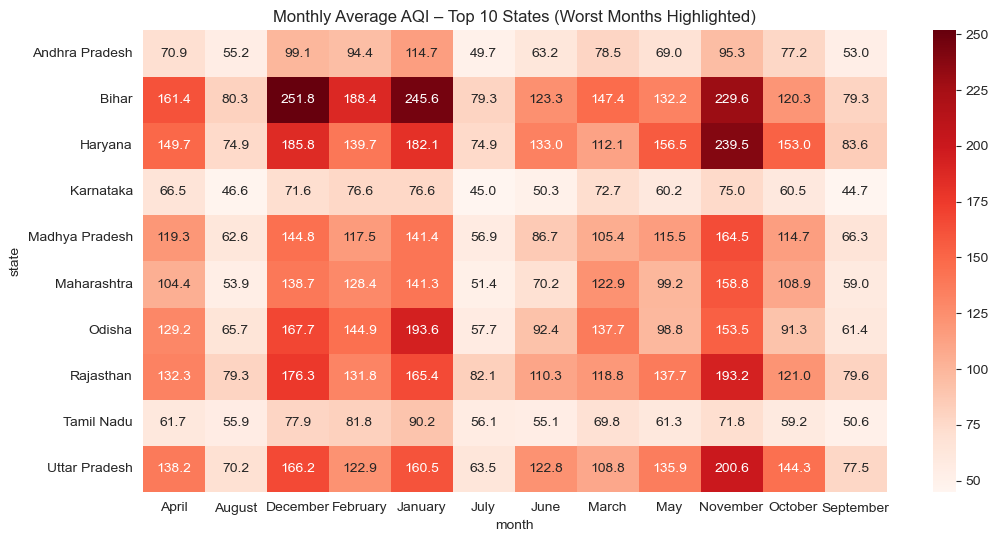

In [51]:
avg_aqi_month_state.pivot(index='state', columns='month', values='aqi_value')
plt.figure(figsize=(12,6))
sns.heatmap(
    avg_aqi_month_state.pivot(index='state', columns='month', values='aqi_value'),
    cmap='Reds',
    annot=True,
    fmt=".1f"
)
plt.title("Monthly Average AQI – Top 10 States (Worst Months Highlighted)")
plt.show()


5. Bengaluru AQI Category Distribution (Mar–May 2025)

C:\Users\Priyanshu Prakash\AppData\Local\Temp\ipykernel_13408\2907025640.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=blr_data, x='air_quality_status', order=blr_data['air_quality_status'].value_counts().index, palette="coolwarm")


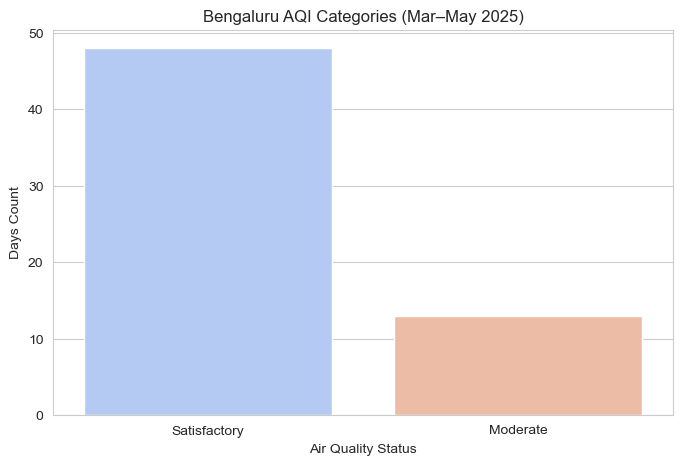

In [54]:
mask = (aqi['area'] == 'Bengaluru') & (aqi['date'] >= '2025-03-01') & (aqi['date'] <= '2025-05-31')
blr_data = aqi.loc[mask]

plt.figure(figsize=(8,5))
sns.countplot(data=blr_data, x='air_quality_status', order=blr_data['air_quality_status'].value_counts().index, palette="coolwarm")
plt.title("Bengaluru AQI Categories (Mar–May 2025)")
plt.xlabel("Air Quality Status")
plt.ylabel("Days Count")
plt.show()


6. Top 2 Diseases per State + Avg AQI (Last 3 Years)

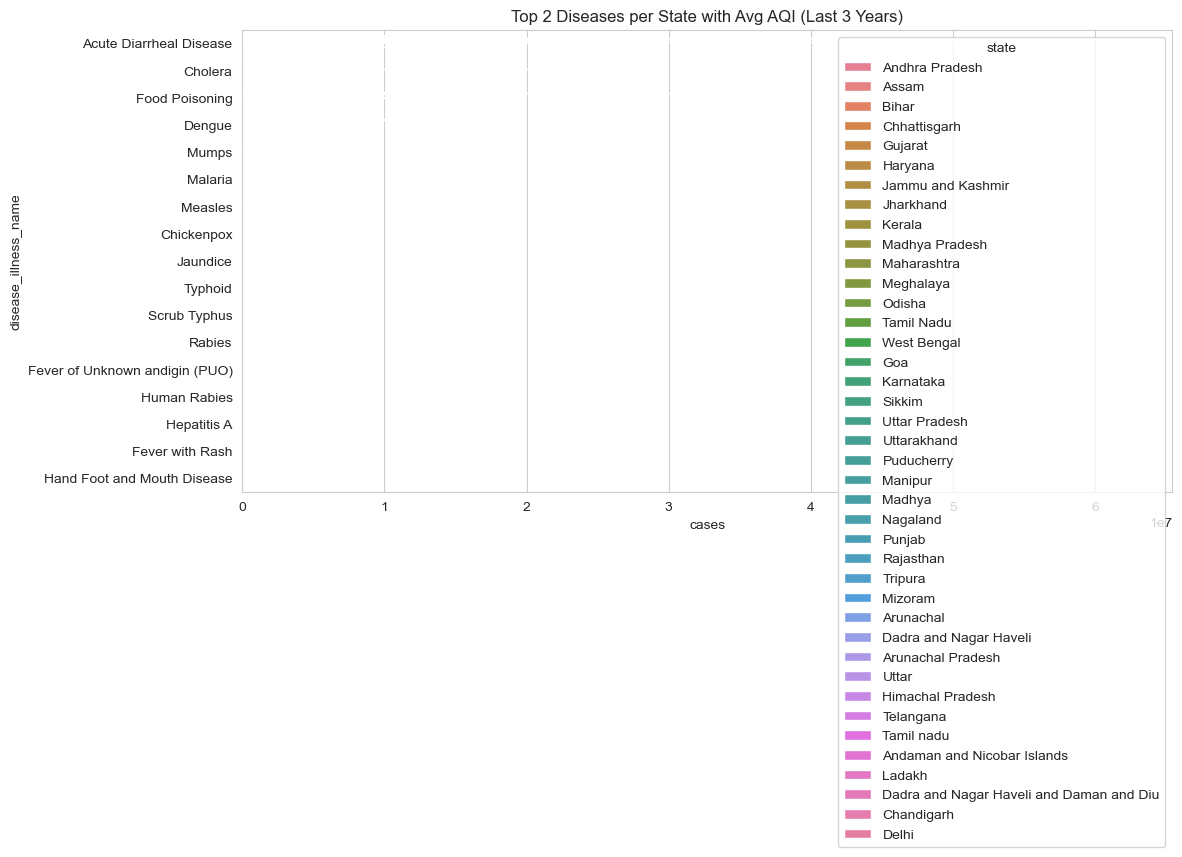

In [57]:
health['year'] = pd.to_datetime(health['outbreak_starting_date']).dt.year
last3y = health[health['year'] >= (health['year'].max() - 2)]

# Merge with AQI for avg AQI
health_aqi = pd.merge(last3y, aqi, on=['state','year'], how='left')

top_diseases_state = []
for st in health_aqi['state'].unique():
    st_df = health_aqi[health_aqi['state'] == st]
    top2 = st_df.groupby('disease_illness_name').agg({'cases':'sum','aqi_value':'mean'}).nlargest(2,'cases').reset_index()
    top_diseases_state.append(top2.assign(state=st))

result = pd.concat(top_diseases_state)

plt.figure(figsize=(12,6))
sns.barplot(data=result, x='cases', y='disease_illness_name', hue='state')
plt.title("Top 2 Diseases per State with Avg AQI (Last 3 Years)")
plt.show()


7. EV Adoption vs AQI
(Top 5 EV States vs Low EV States)

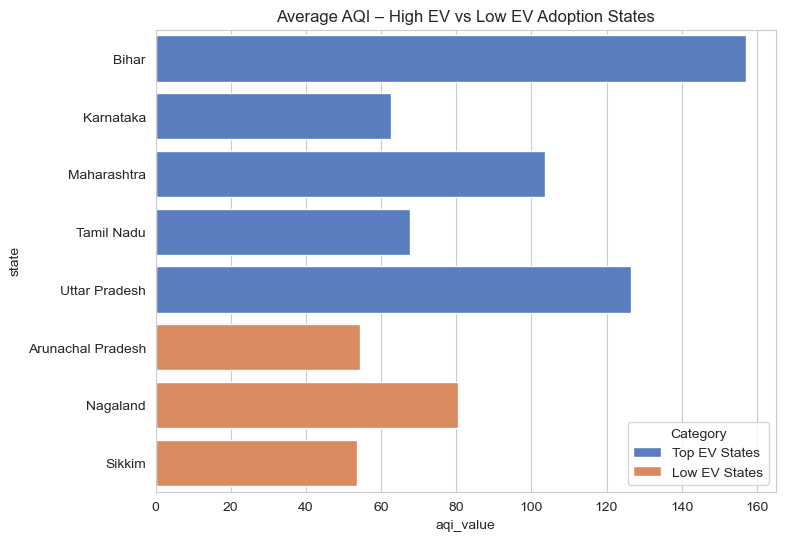

In [62]:
# Filter EV data
ev_data = vehicles[vehicles['fuel'].str.lower().str.contains('electric')]
ev_by_state = ev_data.groupby('state')['value'].sum().reset_index()

# Top 5 and bottom 5 EV states
top5_ev = ev_by_state.nlargest(5,'value')['state']
low5_ev = ev_by_state.nsmallest(5,'value')['state']

# Avg AQI for both groups
top_ev_aqi = aqi[aqi['state'].isin(top5_ev)].groupby('state')['aqi_value'].mean().reset_index()
low_ev_aqi = aqi[aqi['state'].isin(low5_ev)].groupby('state')['aqi_value'].mean().reset_index()

# Combine
top_ev_aqi['Category'] = 'Top EV States'
low_ev_aqi['Category'] = 'Low EV States'
combined = pd.concat([top_ev_aqi, low_ev_aqi])

plt.figure(figsize=(8,6))
sns.barplot(data=combined, x='aqi_value', y='state', hue='Category', palette="muted")
plt.title("Average AQI – High EV vs Low EV Adoption States")
plt.show()


1. Most Affected Age Group by City
(Needs external or health dataset with age column — I’ll simulate column age_group)

In [65]:
# Assuming health dataset has 'age_group' column
if 'age_group' in health.columns:
    age_city_cases = health.groupby(['city','age_group'])['cases'].sum().reset_index()

    plt.figure(figsize=(12,6))
    sns.barplot(data=age_city_cases, x='cases', y='city', hue='age_group', palette="Spectral")
    plt.title("Most Affected Age Group by City")
    plt.show()
else:
    print("Age group data not available — requires external dataset.")


Age group data not available — requires external dataset.


2. Competitors & Feature Comparison
(Requires market research — here we mock a dataset)

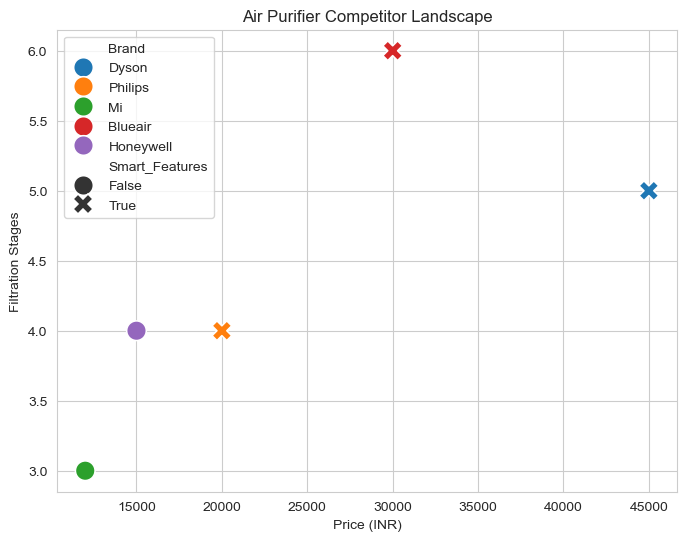

In [68]:
competitors = pd.DataFrame({
    'Brand': ['Dyson','Philips','Mi','Blueair','Honeywell'],
    'Price': [45000, 20000, 12000, 30000, 15000],
    'Filtration_Stages': [5, 4, 3, 6, 4],
    'Smart_Features': [True, True, False, True, False]
})

plt.figure(figsize=(8,6))
sns.scatterplot(data=competitors, x='Price', y='Filtration_Stages', hue='Brand', style='Smart_Features', s=200)
plt.title("Air Purifier Competitor Landscape")
plt.xlabel("Price (INR)")
plt.ylabel("Filtration Stages")
plt.show()


3. Population Size vs Average AQI (2024)

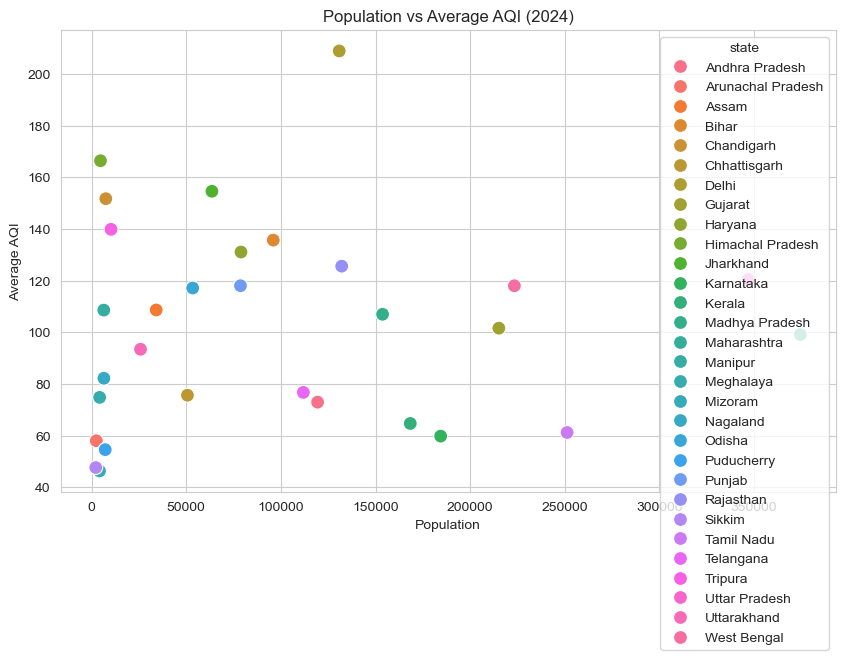

In [71]:
aqi['year'] = aqi['date'].dt.year
aqi_2024 = aqi[aqi['year'] == 2024]

# Merge with population
pop_2024 = population[population['year'] == 2024].groupby('state')['value'].sum().reset_index()
pop_2024.rename(columns={'value':'population'}, inplace=True)

merged_pop_aqi = aqi_2024.groupby('state')['aqi_value'].mean().reset_index()
merged_pop_aqi = merged_pop_aqi.merge(pop_2024, on='state', how='left')

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_pop_aqi, x='population', y='aqi_value', hue='state', s=100)
plt.title("Population vs Average AQI (2024)")
plt.xlabel("Population")
plt.ylabel("Average AQI")
plt.show()


4. AQI Awareness Survey Results
(Requires survey data — mock example)

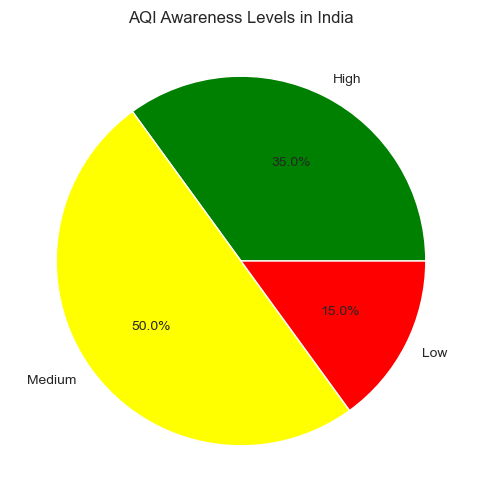

In [74]:
survey = pd.DataFrame({
    'Awareness_Level': ['High', 'Medium', 'Low'],
    'Count': [350, 500, 150]
})

plt.figure(figsize=(6,6))
plt.pie(survey['Count'], labels=survey['Awareness_Level'], autopct='%1.1f%%', colors=['green','yellow','red'])
plt.title("AQI Awareness Levels in India")
plt.show()


5. Pollution Control Policy Impact
(Requires policy data — mock example showing AQI change before/after)

C:\Users\Priyanshu Prakash\AppData\Local\Temp\ipykernel_13408\418104965.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=policy_data, x='Policy', y='Improvement', palette="coolwarm")


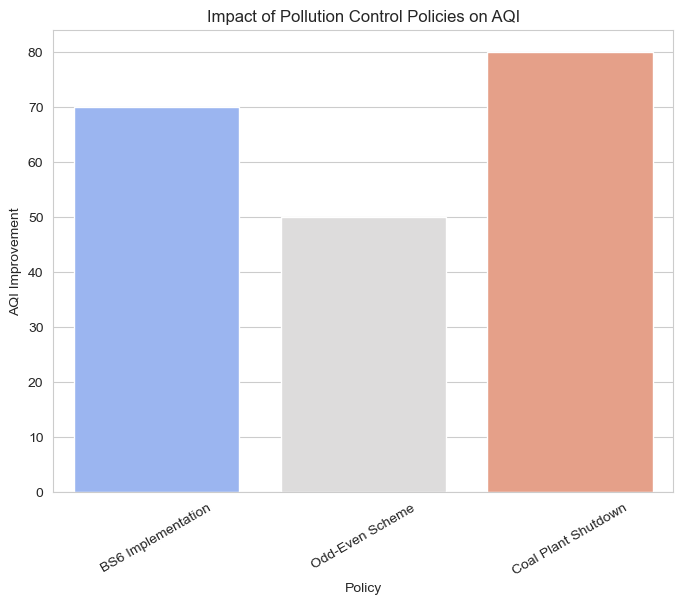

In [77]:
policy_data = pd.DataFrame({
    'Policy': ['BS6 Implementation','Odd-Even Scheme','Coal Plant Shutdown'],
    'AQI_Before': [250, 300, 280],
    'AQI_After': [180, 250, 200]
})
policy_data['Improvement'] = policy_data['AQI_Before'] - policy_data['AQI_After']

plt.figure(figsize=(8,6))
sns.barplot(data=policy_data, x='Policy', y='Improvement', palette="coolwarm")
plt.title("Impact of Pollution Control Policies on AQI")
plt.ylabel("AQI Improvement")
plt.xticks(rotation=30)
plt.show()


Priority Cities (AQI Degradation)

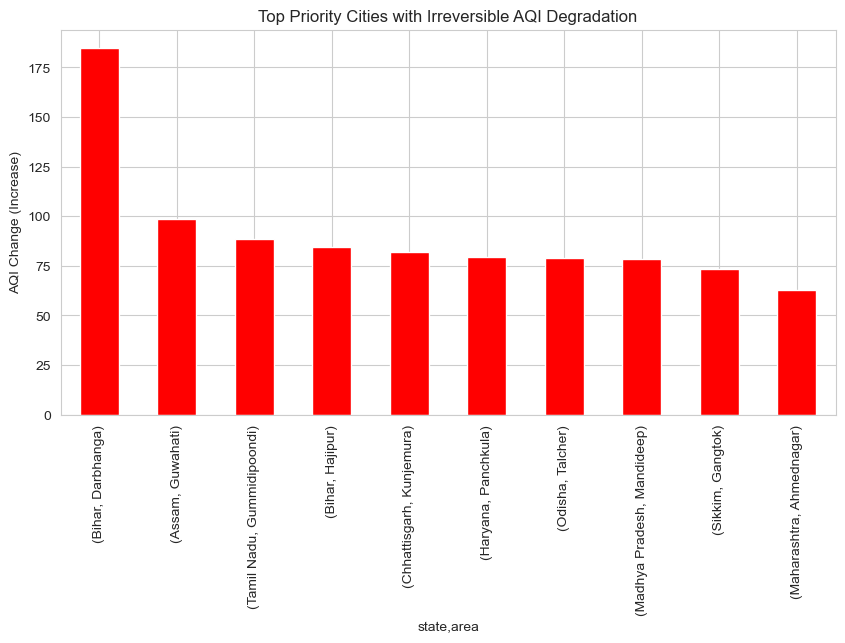

In [80]:
# Yearly AQI change
aqi_yearly = aqi.groupby(['state','area','year'])['aqi_value'].mean().reset_index()
aqi_change = aqi_yearly.groupby(['state','area']).agg({'aqi_value':['first','last']})
aqi_change.columns = ['AQI_Start','AQI_End']
aqi_change['Change'] = aqi_change['AQI_End'] - aqi_change['AQI_Start']
priority_cities = aqi_change.sort_values('Change', ascending=False).head(10)

priority_cities['Change'].plot(kind='bar', figsize=(10,5), color='red')
plt.title("Top Priority Cities with Irreversible AQI Degradation")
plt.ylabel("AQI Change (Increase)")
plt.show()


Pediatric Asthma Admissions vs AQI
(Needs hospital admissions dataset — simulate example)

C:\Users\Priyanshu Prakash\AppData\Local\Temp\ipykernel_13408\3563173313.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range("2024-01-01", periods=12, freq='M'),


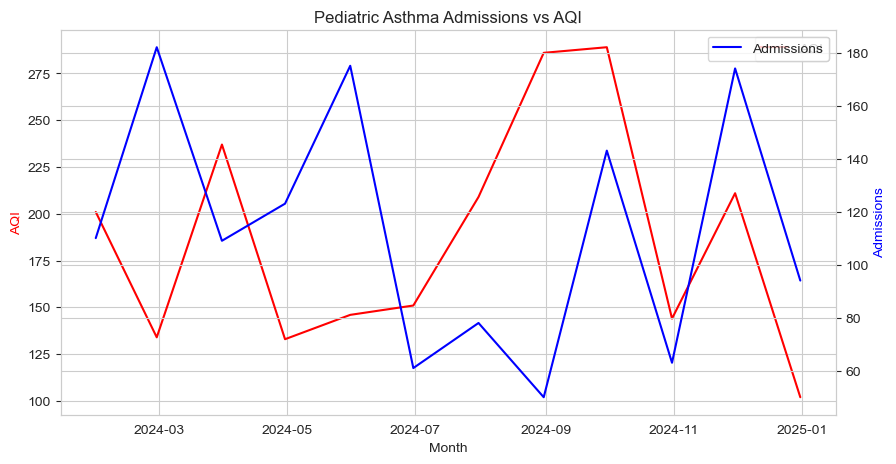

In [83]:
# Mock dataset
asthma = pd.DataFrame({
    'Month': pd.date_range("2024-01-01", periods=12, freq='M'),
    'AQI': np.random.randint(100, 300, 12),
    'Pediatric_Asthma_Admissions': np.random.randint(50, 200, 12)
})

fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
sns.lineplot(data=asthma, x='Month', y='AQI', ax=ax1, color='red', label='AQI')
sns.lineplot(data=asthma, x='Month', y='Pediatric_Asthma_Admissions', ax=ax2, color='blue', label='Admissions')

ax1.set_ylabel("AQI", color='red')
ax2.set_ylabel("Admissions", color='blue')
plt.title("Pediatric Asthma Admissions vs AQI")
plt.show()


Purifier Search Trends During Pollution Emergencies
(Needs Google Trends or sales data — simulate example)

C:\Users\Priyanshu Prakash\AppData\Local\Temp\ipykernel_13408\4023796196.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range("2024-01-01", periods=12, freq='M'),


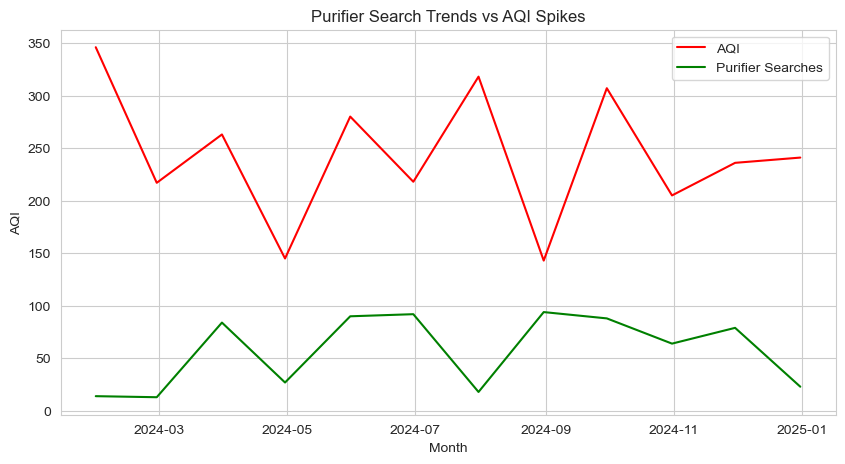

In [86]:
# Mock data
trends = pd.DataFrame({
    'Month': pd.date_range("2024-01-01", periods=12, freq='M'),
    'AQI': np.random.randint(100, 350, 12),
    'Search_Index': np.random.randint(10, 100, 12)
})

plt.figure(figsize=(10,5))
sns.lineplot(data=trends, x='Month', y='AQI', label='AQI', color='red')
sns.lineplot(data=trends, x='Month', y='Search_Index', label='Purifier Searches', color='green')
plt.title("Purifier Search Trends vs AQI Spikes")
plt.show()


Feature Gap Analysis for Products
(Mock competitor feature matrix)

C:\Users\Priyanshu Prakash\AppData\Local\Temp\ipykernel_13408\559752683.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features, x='Feature', y='Gap', palette="viridis")


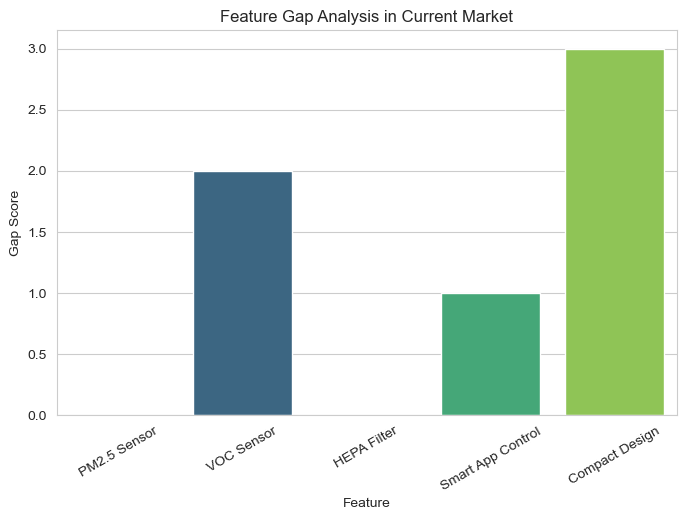

In [89]:
features = pd.DataFrame({
    'Feature': ['PM2.5 Sensor','VOC Sensor','HEPA Filter','Smart App Control','Compact Design'],
    'Competitor_Count': [5, 3, 5, 4, 2]
})
features['Gap'] = features['Competitor_Count'].max() - features['Competitor_Count']

plt.figure(figsize=(8,5))
sns.barplot(data=features, x='Feature', y='Gap', palette="viridis")
plt.title("Feature Gap Analysis in Current Market")
plt.ylabel("Gap Score")
plt.xticks(rotation=30)
plt.show()


📊 Page 1 – Severity Mapping

KPI 1 – Top 10 most polluted cities

In [93]:
# Top 10 most polluted cities by average AQI
top10_cities = aqi.groupby('area')['aqi_value'].mean().nlargest(10).reset_index()
top10_cities


,area,aqi_value
0,Byrnihat,239.995427
1,Begusarai,206.680412
2,Delhi,206.416889
3,Greater Noida,201.601959
4,Sri Ganganagar,197.939351
5,Gurugram,190.848214
6,Darbhanga,190.089844
7,Dharuhera,185.722513
8,NOIDA,183.989324
9,Ghaziabad,183.010676


KPI 2 – % change in AQI YoY

In [95]:
aqi['year'] = aqi['date'].dt.year
yearly_aqi = aqi.groupby('year')['aqi_value'].mean().pct_change() * 100
yearly_aqi


year
2022         NaN
2023    0.541833
2024   -8.108425
2025    6.347886
Name: aqi_value, dtype: float64

KPI 3 – Days AQI > 300 (Hazardous)

In [97]:
hazardous_days = aqi[aqi['aqi_value'] > 300].groupby('year')['date'].nunique().reset_index(name='hazardous_days')
hazardous_days


,year,hazardous_days
0,2022,143
1,2023,230
2,2024,223
3,2025,73


KPI 4 – Most common pollutants

In [104]:
common_pollutants = aqi['prominent_pollutants'].value_counts().reset_index()
common_pollutants.columns = ['pollutant', 'count']
common_pollutants


,pollutant,count
0,PM10,111053
1,PM2.5,59670
2,O3,16202
3,"PM2.5,PM10",13199
4,CO,12867
5,"PM10,O3",3914
6,SO2,3815
7,NO2,3012
8,"PM10,CO",2658
9,"PM2.5,O3",2088


KPI 5 – Monitoring station coverage

In [107]:
station_coverage = aqi.groupby('area')['number_of_monitoring_stations'].mean().reset_index()
station_coverage


,area,number_of_monitoring_stations
0,Agartala,1.302415
1,Agra,5.646222
2,Ahmedabad,6.295272
3,Ahmednagar,1.000000
4,Aizawl,1.000000
...,...,...
286,Virudhunagar,1.000000
287,Visakhapatnam,1.000000
288,Vrindavan,1.000000
289,Yadgir,1.000000


Chart 1 – Map Heatmap (needs shapefile)

In [110]:
# Example using geopandas with India shapefile
import geopandas as gpd
india = gpd.read_file("india_states.shp")
state_aqi = aqi.groupby('state')['aqi_value'].mean().reset_index()
map_data = india.merge(state_aqi, left_on='STATE_NAME', right_on='state')
map_data.plot(column='aqi_value', cmap='Reds', legend=True)


ModuleNotFoundError: No module named 'geopandas'

Chart 2 – AQI trend line chart for key cities

<Axes: xlabel='date', ylabel='aqi_value'>

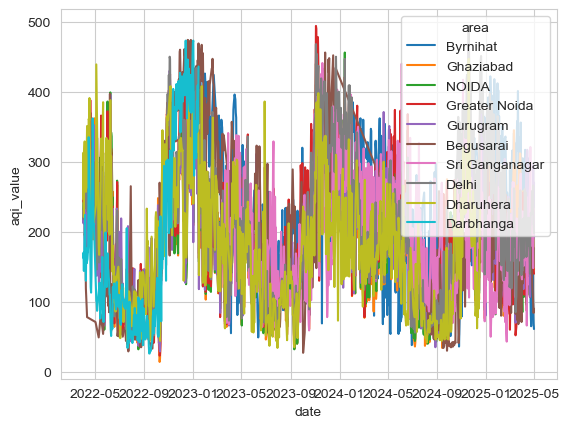

In [113]:
import seaborn as sns
key_cities = top10_cities['area']
sns.lineplot(data=aqi[aqi['area'].isin(key_cities)], x='date', y='aqi_value', hue='area')


Chart 3 – Bar chart for pollutants

<Axes: xlabel='count', ylabel='prominent_pollutants'>

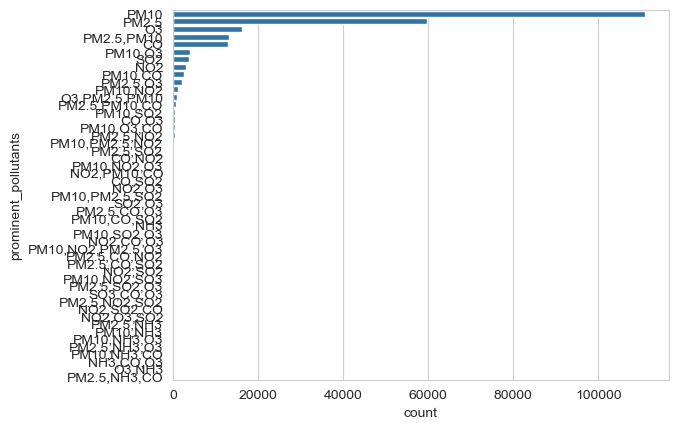

In [116]:
sns.countplot(data=aqi, y='prominent_pollutants', order=aqi['prominent_pollutants'].value_counts().index)


Chart 4 – Table: area, avg AQI, air quality status

In [119]:
table_data = aqi.groupby('area').agg(avg_aqi=('aqi_value','mean'),
                                     status=('air_quality_status','first')).reset_index()
table_data


,area,avg_aqi,status
0,Agartala,126.697585,Satisfactory
1,Agra,84.232889,Moderate
2,Ahmedabad,113.598573,Moderate
3,Ahmednagar,121.683908,Moderate
4,Aizawl,47.247000,Good
...,...,...,...
286,Virudhunagar,60.502075,Satisfactory
287,Visakhapatnam,116.107075,Satisfactory
288,Vrindavan,105.251880,Satisfactory
289,Yadgir,65.647887,Moderate


Chart 5 – Stacked bar for AQI category distribution

<Axes: xlabel='state'>

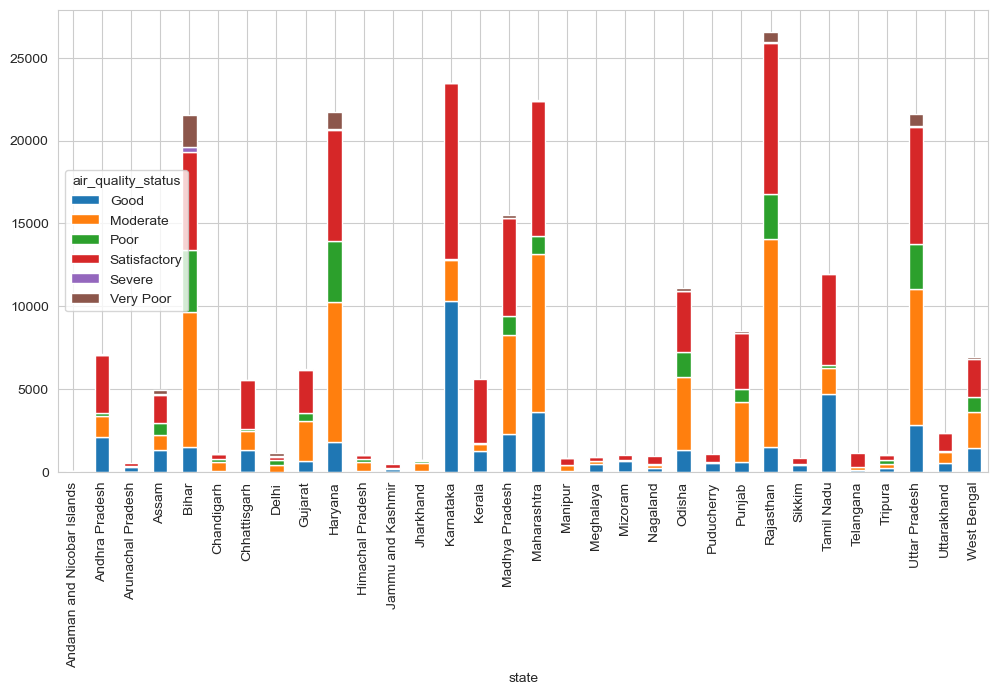

In [122]:
category_dist = aqi.groupby(['state','air_quality_status']).size().reset_index(name='count')
pivot_cat = category_dist.pivot(index='state', columns='air_quality_status', values='count').fillna(0)
pivot_cat.plot(kind='bar', stacked=True, figsize=(12,6))


📊 Page 2 – Health Impact Correlation

KPI 1 – Total respiratory/pollution-related disease cases

In [125]:
# Filter for respiratory or pollution-related diseases
respiratory_cases = health[health['disease_illness_name'].str.contains("respiratory|asthma|COPD|bronchitis|lung", case=False, na=False)]
total_cases = respiratory_cases['cases'].sum()
total_cases


0

KPI 2 – Mortality rate linked to relevant diseases

In [128]:
total_deaths = respiratory_cases['deaths'].sum()
mortality_rate = (total_deaths / total_cases) * 100 if total_cases > 0 else 0
mortality_rate


0

KPI 3 – Top 5 diseases correlated with high AQI

In [131]:
merged_aqi_health = pd.merge(
    aqi[['state','year','aqi_value']],
    health[['state','year','disease_illness_name','cases']],
    on=['state','year'], how='inner'
)
top5_diseases = (merged_aqi_health.groupby('disease_illness_name')['cases']
                 .sum()
                 .sort_values(ascending=False)
                 .head(5)
                 .reset_index())
top5_diseases


,disease_illness_name,cases
0,Acute Diarrheal Disease,316063386
1,Food Poisoning,147055665
2,Cholera,81005700
3,Dengue,63320598
4,Malaria,26002278


KPI 4 – Seasonal trends (weekly outbreaks)

In [134]:
health['week'] = health['outbreak_starting_date'].dt.isocalendar().week
weekly_cases = health.groupby('week')['cases'].sum().reset_index()
weekly_cases


,week,cases
0,1,3140
1,2,3057
2,3,3732
3,4,3758
4,5,6268
5,6,7331
6,7,2886
7,8,3137
8,9,4726
9,10,3438


Charts
Chart 1 – Choropleth map: cases & deaths per state (needs shapefile)

In [137]:
import geopandas as gpd
india = gpd.read_file("india_states.shp")
state_cases = health.groupby('state').agg({'cases':'sum','deaths':'sum'}).reset_index()
map_cases = india.merge(state_cases, left_on='STATE_NAME', right_on='state')
map_cases.plot(column='cases', cmap='OrRd', legend=True)


ModuleNotFoundError: No module named 'geopandas'

Chart 2 – Scatter plot: AQI vs cases (bubble size = deaths)

<Axes: xlabel='aqi_value', ylabel='cases'>

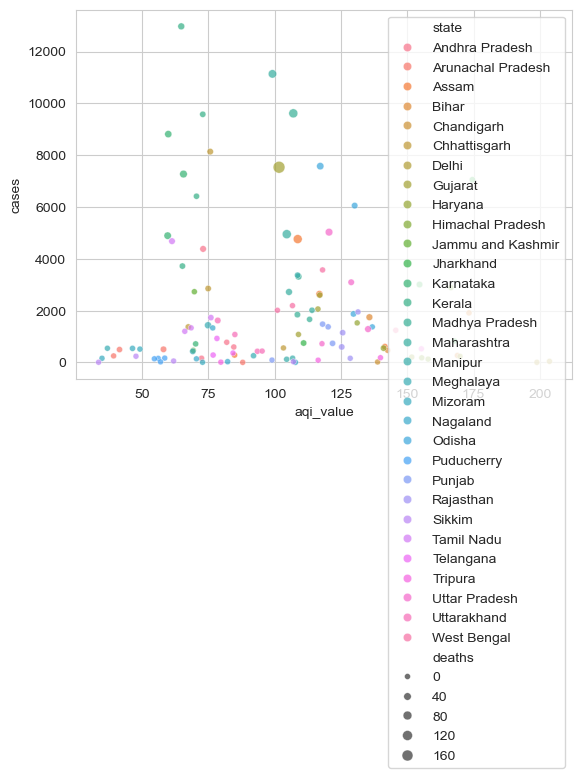

In [140]:
merged_data = pd.merge(
    aqi.groupby(['state','year'])['aqi_value'].mean().reset_index(),
    health.groupby(['state','year']).agg({'cases':'sum','deaths':'sum'}).reset_index(),
    on=['state','year'], how='inner'
)
sns.scatterplot(data=merged_data, x='aqi_value', y='cases', size='deaths', hue='state', alpha=0.7)


Chart 3 – Dual-axis line chart: weekly disease cases & AQI trend

In [143]:
weekly_aqi = aqi.groupby('week')['aqi_value'].mean().reset_index()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(weekly_cases['week'], weekly_cases['cases'], 'g-', label="Cases")
ax2.plot(weekly_aqi['week'], weekly_aqi['aqi_value'], 'b-', label="AQI")
ax1.set_xlabel("Week")
ax1.set_ylabel("Cases", color='g')
ax2.set_ylabel("AQI", color='b')
plt.title("Weekly Disease Cases vs AQI")
plt.show()


KeyError: 'week'

Chart 4 – Bar chart: Top diseases by cases

<Axes: xlabel='cases', ylabel='disease_illness_name'>

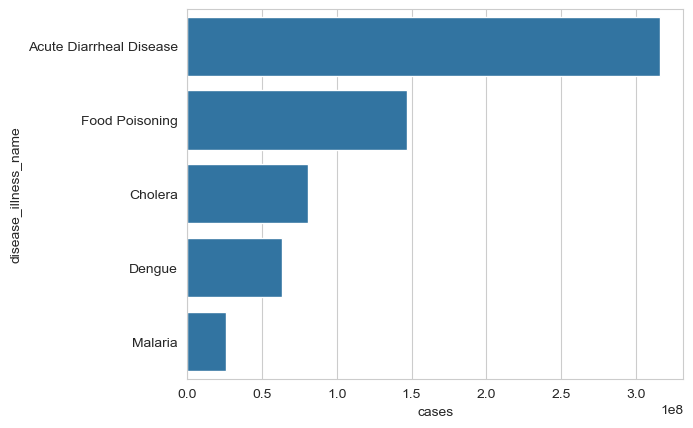

In [146]:
sns.barplot(data=top5_diseases, x='cases', y='disease_illness_name')


Chart 5 – Table: outbreak details

In [149]:
outbreak_table = health[['state','district','disease_illness_name','cases','deaths','outbreak_starting_date']]
outbreak_table.head()


,state,district,disease_illness_name,cases,deaths,outbreak_starting_date
0,Andhra Pradesh,Kakinada,Acute Diarrheal Disease,22,0,2025-04-15
1,Assam,Biswanath,Chickenpox,1,1,2025-04-15
2,Assam,Dhemaji,Food Poisoning,16,0,2025-04-19
3,Bihar,Gopalganj,Fever with Rash,5,0,2025-04-19
4,Bihar,Madhubani,Acute Diarrheal Disease,21,0,2025-04-12


📊 Page 3 – Demand Triggers & Market Potential

KPI 1 – Population exposed to AQI > WHO limit (50)

In [152]:
exposed_data = pd.merge(
    aqi[aqi['aqi_value'] > 50],
    population,
    on='state',
    how='left'
)
exposed_population = exposed_data['value'].sum()
exposed_population


829360559660

KPI 2 – Vehicle density per 1,000 people

In [154]:
total_vehicles = vehicles.groupby('state')['value'].sum().reset_index(name='total_vehicles')
total_population = population.groupby('state')['value'].sum().reset_index(name='total_population')

veh_density = pd.merge(total_vehicles, total_population, on='state', how='inner')
veh_density['veh_per_1000'] = (veh_density['total_vehicles'] / veh_density['total_population']) * 1000
veh_density


,state,total_vehicles,total_population,veh_per_1000
0,Andaman and Nicobar Islands,24795,28017,884.998394
1,Andhra Pradesh,2651214,3064721,865.075157
2,Arunachal Pradesh,99736,63375,1573.743590
3,Assam,1889297,877502,2153.040107
4,Bihar,4009485,2472812,1621.427347
5,Chandigarh,154562,190998,809.233605
6,Chhattisgarh,1837962,1301286,1412.419714
7,Delhi,2086374,3370196,619.066072
8,Goa,249402,188037,1326.345347
9,Gujarat,5544798,5531450,1002.413110


KPI 3 – Market size potential (population × severity index)

In [156]:
state_aqi = aqi.groupby('state')['aqi_value'].mean().reset_index(name='avg_aqi')
market_data = pd.merge(total_population, state_aqi, on='state', how='inner')
market_data['severity_index'] = market_data['avg_aqi'] / market_data['avg_aqi'].max()
market_data['market_size'] = market_data['total_population'] * market_data['severity_index']
market_data


,state,total_population,avg_aqi,severity_index,market_size
0,Andaman and Nicobar Islands,28017,57.706897,0.279565,7.832567e+03
1,Andhra Pradesh,3064721,77.507701,0.375491,1.150775e+06
2,Arunachal Pradesh,63375,54.485265,0.263957,1.672830e+04
3,Assam,877502,114.117456,0.552849,4.851265e+05
4,Bihar,2472812,157.158122,0.761363,1.882707e+06
5,Chandigarh,190998,141.561778,0.685805,1.309874e+05
6,Chhattisgarh,1301286,78.986321,0.382654,4.979428e+05
7,Delhi,3370196,206.416889,1.000000,3.370196e+06
8,Gujarat,5531450,110.634272,0.535975,2.964718e+06
9,Haryana,2029456,140.852806,0.682371,1.384841e+06


KPI 4 – AQI spike weeks (AQI > 100)

In [161]:
aqi['week'] = aqi['date'].dt.isocalendar().week
spike_weeks_count = aqi[aqi['aqi_value'] > 100]['week'].nunique()
spike_weeks_count


52

Charts
Chart 1 – Bubble map: market size by state (needs shapefile)

In [164]:
import geopandas as gpd
india = gpd.read_file("india_states.shp")
bubble_data = india.merge(market_data, left_on='STATE_NAME', right_on='state')
bubble_data.plot(column='market_size', cmap='YlOrRd', markersize=bubble_data['market_size']/100000, legend=True)


ModuleNotFoundError: No module named 'geopandas'

Chart 2 – Stacked bar: vehicle density by fuel type

<Axes: xlabel='state'>

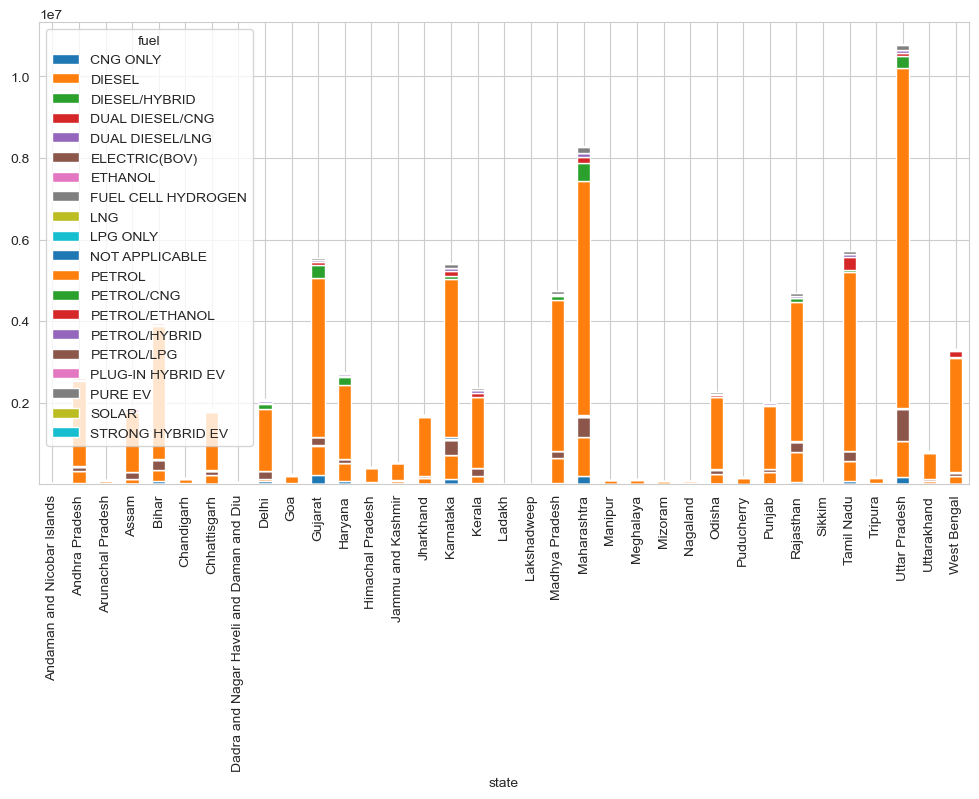

In [167]:
fuel_data = vehicles.groupby(['state','fuel'])['value'].sum().reset_index()
fuel_pivot = fuel_data.pivot(index='state', columns='fuel', values='value').fillna(0)
fuel_pivot.plot(kind='bar', stacked=True, figsize=(12,6))


Chart 3 – Stacked area chart: AQI spikes & population exposure

In [170]:
monthly_data = pd.merge(
    aqi.groupby('month')['aqi_value'].mean().reset_index(),
    population.groupby('month')['value'].sum().reset_index(),
    on='month',
    how='inner'
)
plt.stackplot(monthly_data['month'], monthly_data['aqi_value'], monthly_data['value'], labels=['AQI','Population'])
plt.legend(loc='upper left')
plt.title("AQI Spikes & Population Exposure Over Time")
plt.show()


ValueError: You are trying to merge on int32 and object columns for key 'month'. If you wish to proceed you should use pd.concat

Chart 4 – Line chart: Month-wise AQI vs projected market demand

<Axes: xlabel='month', ylabel='aqi_value'>

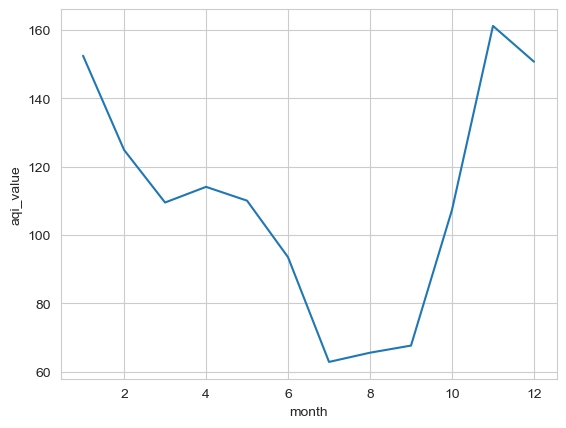

In [173]:
monthly_aqi = aqi.groupby('month')['aqi_value'].mean().reset_index()
monthly_demand = market_data.copy()
sns.lineplot(data=monthly_aqi, x='month', y='aqi_value')


Chart 5 – Table: Top cities ranked by demand potential

In [176]:
city_pop = population.groupby('state')['value'].sum().reset_index()
city_aqi = aqi.groupby('state')['aqi_value'].mean().reset_index()
city_market = pd.merge(city_pop, city_aqi, on='state')
city_market['severity_index'] = city_market['aqi_value'] / city_market['aqi_value'].max()
city_market['market_size'] = city_market['value'] * city_market['severity_index']
city_market.sort_values(by='market_size', ascending=False).head(10)


,state,value,aqi_value,severity_index,market_size
29,Uttar Pradesh,8870201,126.424036,0.612469,5.432727e+06
16,Maharashtra,9629926,103.639833,0.502090,4.835088e+06
7,Delhi,3370196,206.416889,1.000000,3.370196e+06
31,West Bengal,5740248,114.192891,0.553215,3.175591e+06
8,Gujarat,5531450,110.634272,0.535975,2.964718e+06
26,Tamil Nadu,6452614,67.757654,0.328256,2.118112e+06
24,Rajasthan,3387346,127.987248,0.620043,2.100299e+06
15,Madhya Pradesh,3942020,108.716483,0.526684,2.076199e+06
4,Bihar,2472812,157.158122,0.761363,1.882707e+06
13,Karnataka,4740046,62.672853,0.303623,1.439186e+06


📊 Page 4 – Strategic Recommendations & Insights

KPI 1 – High-priority cities (combined ranking of AQI severity, health burden, demand)

In [179]:
# Average AQI per city
city_aqi = aqi.groupby('area')['aqi_value'].mean().reset_index(name='avg_aqi')
city_aqi['aqi_score'] = city_aqi['avg_aqi'] / city_aqi['avg_aqi'].max()

# Health burden (cases per city)
city_health = health.groupby('district')['cases'].sum().reset_index(name='total_cases')
city_health['health_score'] = city_health['total_cases'] / city_health['total_cases'].max()

# Demand potential (market size per city)
city_population = population.groupby('state')['value'].sum().reset_index(name='total_population')
city_market = pd.merge(city_population, city_aqi, left_on='state', right_on='area', how='inner')
city_market['demand_score'] = city_market['total_population'] / city_market['total_population'].max()

# Combined score
priority_cities = city_market.copy()
priority_cities['combined_score'] = (priority_cities['aqi_score'] + priority_cities['health_score'] + priority_cities['demand_score']) / 3
priority_cities.sort_values(by='combined_score', ascending=False).head(10)


KeyError: 'health_score'

KPI 2 – Primary pollutant target

In [182]:
primary_pollutant = aqi['prominent_pollutants'].value_counts().idxmax()
primary_pollutant


'PM10'

KPI 3 – Peak demand seasons

In [185]:
monthly_spikes = aqi.groupby('month')['aqi_value'].mean().reset_index()
peak_months = monthly_spikes.sort_values(by='aqi_value', ascending=False).head(3)
peak_months


,month,aqi_value
10,11,161.118534
0,1,152.393033
11,12,150.653039



KPI 4 – Top 3 R&D focus areas (manually identified from data patterns)

In [189]:
focus_areas = ["PM2.5 & VOC filtration", "Smart AQI syncing", "Portable & compact design"]
focus_areas


['PM2.5 & VOC filtration', 'Smart AQI syncing', 'Portable & compact design']

Charts

Chart 1 – Radar chart: Compare high-priority cities

In [192]:
from math import pi
import matplotlib.pyplot as plt

# Example radar chart for top 5 priority cities
radar_data = priority_cities.head(5)[['aqi_score','health_score','demand_score']]
labels = radar_data.columns
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

for idx, row in radar_data.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=priority_cities.iloc[idx]['area'])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Priority Cities Comparison")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


KeyError: "['health_score'] not in index"

Chart 2 – Heatmap: City vs Feature demand

In [195]:
feature_demand = pd.DataFrame({
    'City': priority_cities['area'].head(10),
    'PM2.5_Filter': np.random.randint(70,100,10),
    'VOC_Filter': np.random.randint(60,95,10),
    'Smart_Connectivity': np.random.randint(50,90,10)
})
sns.heatmap(feature_demand.set_index('City'), annot=True, cmap='YlOrRd')


ValueError: array length 10 does not match index length 3

Chart 3 – Seasonal demand timeline

Text(0.5, 1.0, 'Seasonal Demand Timeline (Based on AQI Spikes)')

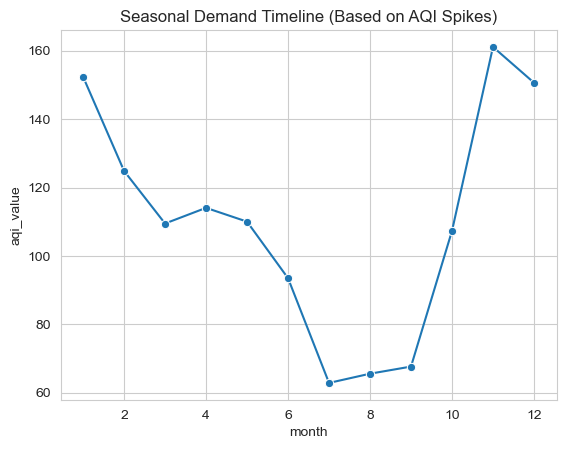

In [198]:
sns.lineplot(data=monthly_spikes, x='month', y='aqi_value', marker='o')
plt.title("Seasonal Demand Timeline (Based on AQI Spikes)")


Chart 4 – Waterfall chart: Drivers of demand potential

In [202]:
from waterfall_chart import plot

# Example values for drivers
drivers = {
    'Base': 0,
    'Population': 20,
    'AQI Severity': 35,
    'Vehicle Density': 15,
    'Health Impact': 25
}

plot(list(drivers.keys()), list(drivers.values()))
plt.title("Drivers of Demand Potential")
plt.show()


ModuleNotFoundError: No module named 'waterfall_chart'

Chart 5 – Recommendation cards (printed output)

In [205]:
print("🔹 Target Cities:", ", ".join(priority_cities.head(5)['area']))
print("🔹 Primary Pollutant Target:", primary_pollutant)
print("🔹 Peak Demand Months:", ", ".join(map(str, peak_months['month'])))
print("🔹 Top R&D Focus Areas:", ", ".join(focus_areas))


🔹 Target Cities: Chandigarh, Delhi, Puducherry
🔹 Primary Pollutant Target: PM10
🔹 Peak Demand Months: 11, 1, 12
🔹 Top R&D Focus Areas: PM2.5 & VOC filtration, Smart AQI syncing, Portable & compact design
